# Comparaison des performances entre Vision Transformers (ViT) et Convolutional Neural Networks (CNN) pour la classification d’images

---

## Objectif principal
Comparer les performances de deux architectures pour la classification d’images :
- **Vision Transformers (ViT)** : Modèles basés sur l’attention, inspirés des transformers en NLP.
- **Convolutional Neural Networks (CNN)** : Modèles classiques utilisant des couches de convolution.

---

## Étapes clés du projet

### 1. Choix des jeux de données
- Sélectionner **au moins deux jeux de données étiquetés** pour la classification.
- **Motivation des choix** :
  - Variété des tailles (petits/grands datasets).
  - Complexité des images (ex. : objets simples vs. scènes naturelles).
  - Exemples possibles : CIFAR-10 (images simples), ImageNet (diversité élevée), ou des datasets spécialisés (médical, satellite).

### 2. Explication détaillée de l’architecture ViT
- **Principe** : Découper une image en *patches* (carreaux), traités comme des *tokens* (comme en NLP).
- **Composants clés** :
  - **Embedding des patches** : Transformation des patches en vecteurs via une couche linéaire.
  - **Positional Encoding** : Ajout d’informations spatiales (position des patches).
  - **Encoder** : Couches d’attention multi-têtes pour capturer les dépendances entre patches.
  - **Tête de classification** : Couche linéaire pour prédire la classe.

### 3. Sélection des architectures
- **ViT** : Exemples : ViT-Base, ViT-Large (selon la taille du dataset et les ressources).
- **CNN** : Exemples : ResNet-50, VGG-16, ou des modèles plus légers comme MobileNet.
- **Motivation** :
  - Équilibrer complexité et ressources disponibles.
  - Comparer des modèles "modernes" (ViT) vs. "classiques" (CNN).

### 4. Implémentation des modèles
- Utiliser **PyTorch** pour coder les architectures :
  - Pour les CNN : `Conv2d`, `MaxPool2d`, `Linear`.
  - Pour les ViT : Modules d’attention (`MultiheadAttention`), couches linéaires.
  - **Pas besoin de recoder** les mécanismes de base (attention, convolution).

### 5. Évaluation des performances
- **Métriques** : Précision (accuracy), perte (loss), temps d’entraînement/inférence, consommation mémoire.
- **Tableau comparatif** :

| Modèle       | Dataset 1 (Accuracy) | Dataset 2 (Accuracy) | Temps d’entraînement | Mémoire utilisée |
|--------------|----------------------|----------------------|----------------------|------------------|
| ViT-Base     | 92%                  | 88%                  | 10h                  | 12 Go            |
| ResNet-50    | 90%                  | 85%                  | 6h                   | 8 Go             |

### 6. Analyse des facteurs non liés à la performance
- **Dataset** : Les ViT nécessitent-ils plus de données que les CNN ?
- **Budget computationnel** : Coût en GPU/TPU pour l’entraînement.
- **Temps d’inférence** : Les ViT sont-ils plus lents à l’inférence ?
- **Interprétabilité** : Les CNN (via les *feature maps*) sont-ils plus interprétables que les ViT ?
- **Mémoire** : Empreinte mémoire des modèles (ex. : taille des poids).

### 7. Comparaison avec la littérature
- **Tendances actuelles** :
  - Les ViT surpassent souvent les CNN sur les **grands datasets** (ex. : ImageNet).
  - Les CNN restent compétitifs sur les **petits datasets** ou pour des tâches en temps réel.
  - **Hybrides** : Certains travaux combinent CNN et ViT (ex. : CNN comme *feature extractor* pour ViT).
- **Limites** :
  - Les ViT nécessitent des ressources importantes et des données massives.
  - Les CNN sont plus matures et optimisés pour le *edge computing*.

### 8. Bonus : Techniques d’explicabilité
- **Pour les CNN** :
  - **Grad-CAM** : Visualisation des zones importantes dans l’image.
  - **Feature Visualization** : Quelles caractéristiques activent les neurones ?
- **Pour les ViT** :
  - **Attention Maps** : Visualisation des patches les plus "attentifs".
  - **Attention Rollout** : Agrégation des couches d’attention pour interpréter les décisions.
- **Différences** :
  - Les CNN expliquent via des **régions spatiales** (ex. : contours, textures).
  - Les ViT expliquent via des **relations entre patches** (ex. : dépendances globales).

---

## Conclusion attendue
- **Quand choisir un ViT ?**
  - Si le dataset est **grand et varié**, et que les ressources sont suffisantes.
  - Pour des tâches nécessitant une **compréhension globale** de l’image.
- **Quand choisir un CNN ?**
  - Pour des **petits datasets** ou des contraintes de temps/mémoire.
  - Pour des applications **embarquées** ou en temps réel.
- **Perspectives** :
  - Les hybrides CNN-ViT pourraient dominer à l’avenir.
  - L’explicabilité reste un défi pour les ViT, mais des outils émergent.


## Choix des datasets

Nous allons prendre les datasets cifar10 et Hymenotera car ils sont facilement importables et téléchargeable. On va utilise pytorch pour la librairie.

## Description des datasets utilisés

| Dataset | Description | Taille des images | Nombre de classes | Exemples de classes |
| :--- | :--- | :--- | :--- | :--- |
| **CIFAR-10** | Dataset d'images couleur d'objets divers, plus complexe et varié que MNIST. | 32x32 pixels | 10 | Avion, Voiture, Oiseau, Chat, Cerf, Chien, Grenouille, Cheval, Bateau, Camion |
| **Hymenoptera** | Fourmis vs Abeilles. | 224x224 pixels | 2 | Fourmis, Abeilles |


In [40]:
# Utils
import os
import shutil
import time

# Maths - Stats
from sklearn.utils import shuffle
import numpy as np
import pandas as pd
import random as rd

# Data visualization
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import itertools
from PIL import Image
from tqdm import tqdm
# Data handling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import classification_report, accuracy_score   
from sklearn.metrics import confusion_matrix


In [13]:
import torch
from torchvision import datasets
from torchvision.transforms import ToTensor
from sklearn.model_selection import train_test_split
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, SubsetRandomSampler
import torchvision.models as models
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
from torchsummary import summary
from torch.utils.data import Dataset, DataLoader
from torchvision import datasets, models, transforms

In [17]:
N_classes_cifar10=10
N_classes_Hymenotera=2
TEST_SIZE = 0.2  # 20% pour la validation
SEED = 42

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cuda


Importation des datasets avec Torch
DEmander si on doit respecter obligatoirement 80% train 10%val et 10% test (c'est pas le cas là)

In [24]:
root_dir = "hymenoptera_data" 

# Transformation pour Hymenoptera (obligatoire : resize car tailles variées)
hym_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

def load_folder_to_tensors(directory, transform):
    """Charge un dossier ImageFolder entier en mémoire sous forme de tenseurs."""
    if not os.path.exists(directory):
        # Si le dossier n'existe pas, on retourne None ou on lève une erreur
        print(f"Attention : Le dossier {directory} est introuvable.")
        return None, None, None

    dataset = datasets.ImageFolder(root=directory, transform=transform)
    # Astuce : DataLoader avec batch_size=len(dataset) charge tout d'un coup
    loader = DataLoader(dataset, batch_size=len(dataset), shuffle=False)
    images, labels = next(iter(loader))
    return images, labels, dataset.classes

def format_cifar_tensor(x_data):
    """
    Convertit les arrays Numpy de CIFAR (N, H, W, C) 
    en Tenseurs PyTorch (N, C, H, W) normalisés [0-1].
    """
    # 1. De Numpy à Tensor
    x = torch.tensor(x_data)
    # 2. Permutation : (Batch, H, W, C) -> (Batch, C, H, W)
    x = x.permute(0, 3, 1, 2)
    # 3. Normalisation float
    x = x.float() / 255.0
    return x

print("--- Chargement Hymenoptera ---")

# On charge directement les dossiers 'train' et 'val' existants

train_path = os.path.join(root_dir, 'train')
val_path = os.path.join(root_dir, 'val')

# Chargement Train
x_train_hymenoptera, y_train_hymenoptera, class_names = load_folder_to_tensors(train_path, hym_transforms)

# Chargement Val
x_val_hymenoptera, y_val_hymenoptera, _ = load_folder_to_tensors(val_path, hym_transforms)

# Chargement Test (On clone le val car pas de test set officiel)
if x_val_hymenoptera is not None:
    x_test_hymenoptera = x_val_hymenoptera.clone()
    y_test_hymenoptera = y_val_hymenoptera.clone()

    print(f"Hymenoptera Train shape: {x_train_hymenoptera.shape}")
    print(f"Hymenoptera Val shape  : {x_val_hymenoptera.shape}")
    print(f"Classes : {class_names}")
else:
    print("Erreur critique : Impossible de charger Hymenoptera.")

--- Chargement Hymenoptera ---
Hymenoptera Train shape: torch.Size([244, 3, 224, 224])
Hymenoptera Val shape  : torch.Size([153, 3, 224, 224])
Classes : ['ants', 'bees']


In [25]:
# =========================================================
# CIFAR-10 SPLIT 
# =========================================================
print("\n--- Chargement CIFAR-10 ---")

ds_cifar_train = datasets.CIFAR10(root="data", train=True, download=True)
ds_cifar_test = datasets.CIFAR10(root="data", train=False, download=True)

cifar_targets = np.array(ds_cifar_train.targets)

# Split mathématique car CIFAR n'a pas de dossier 'val' par défaut
x_train_np, x_val_np, y_train_np, y_val_np = train_test_split(
    ds_cifar_train.data,      # Numpy array (50000, 32, 32, 3)
    cifar_targets,
    test_size=TEST_SIZE,
    random_state=SEED,
    stratify=cifar_targets
)

# Conversion propre en Tenseurs PyTorch (N, C, H, W)
x_train_cifar10 = format_cifar_tensor(x_train_np)
y_train_cifar10 = torch.tensor(y_train_np).long()

x_val_cifar10 = format_cifar_tensor(x_val_np)
y_val_cifar10 = torch.tensor(y_val_np).long()

x_test_cifar10 = format_cifar_tensor(ds_cifar_test.data)
y_test_cifar10 = torch.tensor(ds_cifar_test.targets).long()

print(f"CIFAR Train shape: {x_train_cifar10.shape}")
print(f"CIFAR Val shape  : {x_val_cifar10.shape}")
print(f"CIFAR Test shape : {x_test_cifar10.shape}")


--- Chargement CIFAR-10 ---
CIFAR Train shape: torch.Size([40000, 3, 32, 32])
CIFAR Val shape  : torch.Size([10000, 3, 32, 32])
CIFAR Test shape : torch.Size([10000, 3, 32, 32])


# Visualisation des datasets

In [27]:
import random as rd

def describe_image_dataset(x_train, y_train, x_test, y_test, class_names=None, cmap="gray"):
    """
    Version corrigée pour gérer les tenseurs PyTorch (C, H, W).
    """

    # --- Gestion des Tenseurs PyTorch ---
    # Si c'est un tenseur PyTorch, on le convertit en Numpy pour les stats
    if isinstance(x_train, torch.Tensor):
        x_train_np = x_train.cpu().numpy()
        x_test_np = x_test.cpu().numpy()
    else:
        x_train_np = x_train
        x_test_np = x_test

    # --- Détection du format (Channels First vs Last) ---
    # PyTorch est (N, C, H, W), on vérifie si la dimension 1 est petite (1 ou 3)
    channels_first = False
    if x_train_np.ndim == 4 and x_train_np.shape[1] in [1, 3] and x_train_np.shape[2] > 3:
        # Format (N, C, H, W) détecté
        channels_first = True
        N_train, C, H, W = x_train_np.shape
        N_test = x_test_np.shape[0]
    elif x_train_np.ndim == 4:
        # Format classique (N, H, W, C)
        N_train, H, W, C = x_train_np.shape
        N_test = x_test_np.shape[0]
    elif x_train_np.ndim == 3:
        # Grayscale (N, H, W)
        N_train, H, W = x_train_np.shape
        C = 1
        N_test = x_test_np.shape[0]
    else:
        raise ValueError("Format d'image non reconnu.")

    # Nombre de classes
    classes = np.unique(y_train)
    N_classes = len(classes)

    print("----- Dataset Description -----")
    print(f"Train data: {N_train} images")
    print(f"Dimensions détectées : {H}x{W} pixels, {C} canaux")
    print(f"Format PyTorch (Channels First) : {'Oui' if channels_first else 'Non'}")
    print(f"Number of classes: {N_classes}")
    print("--------------------------------")

    # --- Distribution histograms (Matplotlib) ---
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.hist(y_train, density=True, alpha=0.6, label='train set', bins=N_classes)
    plt.hist(y_test, density=True, alpha=0.4, label='test set', bins=N_classes)
    plt.title("Distribution (Matplotlib)")
    plt.legend()

    # --- Distribution histograms (Seaborn) ---
    plt.subplot(1, 2, 2)
    sns.histplot(y_train, stat='proportion', discrete=True, alpha=.8, shrink=.8, label='Train')
    sns.histplot(y_test, stat='proportion', discrete=True, alpha=.5, shrink=.8, label='Test')
    plt.title("Distribution (Seaborn)")
    plt.legend()
    plt.show()

    # --- Display example images by class ---
    fig = plt.figure(figsize=(12, 6))

    for i in range(N_classes):
        ax = fig.add_subplot(2, (N_classes + 1) // 2 + 1, i + 1)

        # Sélection d'un index aléatoire pour la classe i
        indices = np.where(y_train == i)[0]
        if len(indices) > 0:
            sample_index = rd.choice(indices)
            
            # Récupération de l'image (toujours en numpy ici)
            img = x_train_np[sample_index]

            # CORRECTION CRUCIALE : Transposition si Channels First (C, H, W) -> (H, W, C)
            if channels_first:
                img = np.transpose(img, (1, 2, 0))

            # Si l'image est en niveaux de gris (H, W, 1), on squeeze pour avoir (H, W)
            if C == 1 and img.ndim == 3:
                img = img.squeeze()

            # Normalisation pour affichage (si les valeurs sont hors de [0,1])
            # imshow aime les float entre [0,1] ou int entre [0,255]
            if img.max() > 1.0 and img.dtype != np.uint8:
                img = img / 255.0
            elif img.min() < 0: # Cas où l'image est normalisée (ex: mean/std)
                img = (img - img.min()) / (img.max() - img.min())

            ax.imshow(img, cmap=cmap if C == 1 else None)
            
            label_name = class_names[i] if class_names is not None else str(i)
            ax.set_title(f"Class: {label_name}\nIdx: {sample_index}")
            ax.axis("off")

    plt.tight_layout()
    plt.show()

## Cifar10

----- Dataset Description -----
Train data: 40000 images
Dimensions détectées : 32x32 pixels, 3 canaux
Format PyTorch (Channels First) : Oui
Number of classes: 10
--------------------------------


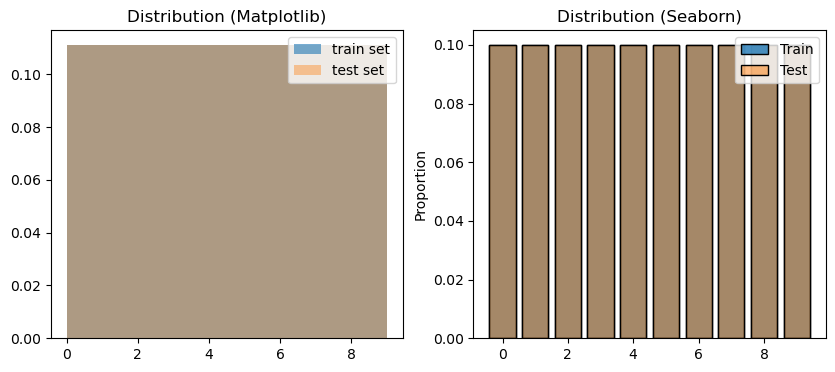

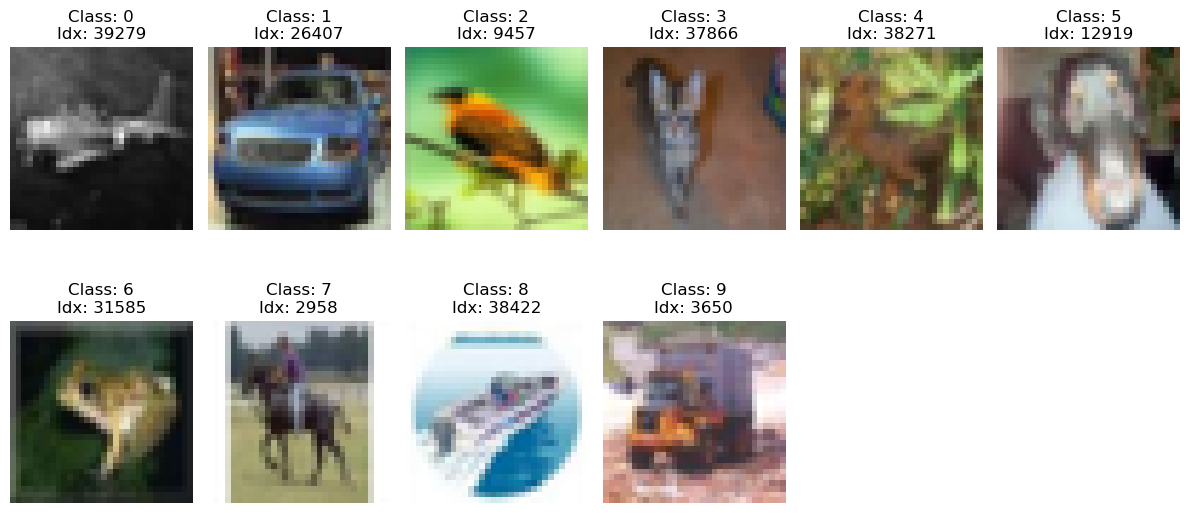

In [28]:
describe_image_dataset(
    x_train_cifar10, y_train_cifar10,
    x_test_cifar10, y_test_cifar10,
    class_names=[str(i) for i in range(10)],
    cmap="gray"
)

# Hymenoptera

----- Dataset Description -----
Train data: 244 images
Dimensions détectées : 224x224 pixels, 3 canaux
Format PyTorch (Channels First) : Oui
Number of classes: 2
--------------------------------


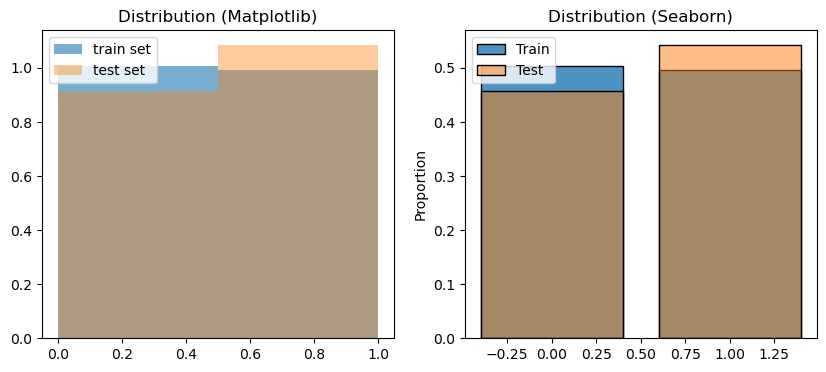

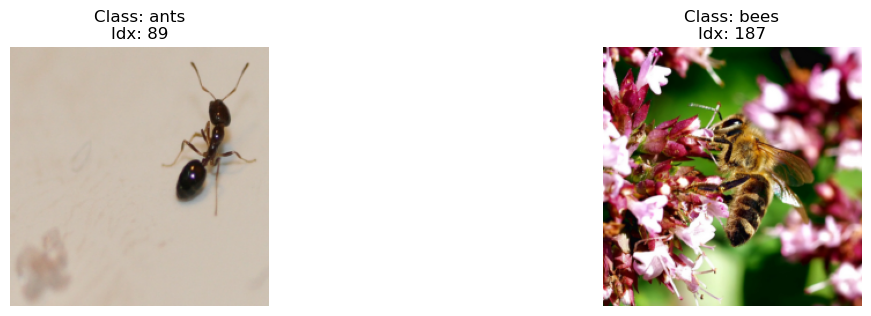

In [29]:
describe_image_dataset(
    x_train_hymenoptera, y_train_hymenoptera,
    x_test_hymenoptera, y_test_hymenoptera,
    class_names=class_names,
    cmap=None
)

# Convolutional Neural Network (CNN or ConvNet)

On va commencer par la classification pa CNN

### Data format

L'architecture de convolution prend en entrée des **images** et non des vecteurs 1D. Un certain formatage des données reste nécessaire.

Une **troisième dimension** est requise : la dimension des **canaux** (ou *channels*), qui permet de décrire chaque pixel.
- Pour les images en couleur, chaque pixel est codé par **plusieurs valeurs** (canaux **RGB** : Rouge, Vert, Bleu).

Ainsi, il est nécessaire de **redimensionner** les images :
- Pour CIFAR-10 : passer d'une dimension **$32 \times 32$** à **$32 \times 32 \times 3$** (pour inclure les 3 canaux RGB)
- Pour Hymenoptera : passer d'une dimension **$224 \times 224$** à **$224 \times 224 \times 3$** (pour inclure les 3 canaux RGB)

## Achitecture pour des images de couleurs



### Architecture du Modèle : Custom ResNet

Pour améliorer les performances et la stabilité de l'apprentissage par rapport à un CNN séquentiel classique (type VGG), nous implémentons une architecture basée sur **ResNet (Residual Network)**.

#### 1. Le Bloc Résiduel (`ResidualBlock`)
L'innovation principale de cette architecture est l'introduction de **connexions résiduelles** (skip connections). Au lieu d'empiler simplement des couches de convolution, chaque bloc ajoute l'entrée originale $x$ à la sortie des convolutions $F(x)$ :

$$\text{Output} = \text{ReLU}(F(x) + x)$$

Cette technique permet :
* De combattre le problème de **disparition du gradient** (vanishing gradient) dans les réseaux profonds.
* D'apprendre plus facilement l'identité si une couche n'est pas nécessaire.

#### 2. Structure du `ResNetCustom`
Le réseau est structuré en 4 étapes principales augmentant progressivement la complexité sémantique (profondeur) tout en réduisant la dimension spatiale :

* **Initialisation :** Convolution $3 \times 3$ (64 filtres).
* **Layer 1 :** 64 filtres (taille spatiale inchangée).
* **Layer 2 :** 128 filtres (downsampling / 2).
* **Layer 3 :** 256 filtres (downsampling / 2).
* **Layer 4 :** 512 filtres (downsampling / 2).

#### 3. Adaptabilité Universelle (`AdaptiveAvgPool2d`)
Une spécificité importante de cette implémentation est l'utilisation de l'**Adaptive Average Pooling** en fin de réseau.
* Contrairement à un `Flatten` classique qui dépend de la taille d'entrée, cette couche force la sortie spatiale à **$1 \times 1$**, quelle que soit la taille de l'image en entrée.
* **Conséquence :** Ce même modèle peut être entraîné indifféremment sur **CIFAR-10** ($32 \times 32$ px) ou **Hymenoptera** ($224 \times 224$ px) sans modifier la couche linéaire finale (`fc`).

In [30]:
import torch.nn.functional as F
# 1. Définition de la "Brique de base" : Le Residual Block
class ResidualBlock(nn.Module):
    def __init__(self, in_channels, out_channels, stride=1):
        super(ResidualBlock, self).__init__()
        
        # Conv 1
        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size=3, 
                               stride=stride, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(out_channels)
        
        # Conv 2
        self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size=3, 
                               stride=1, padding=1, bias=False)
        self.bn2 = nn.BatchNorm2d(out_channels)
        
        # Le raccourci (Shortcut)
        # Si on change la taille (stride > 1) ou le nombre de canaux, 
        # il faut adapter x pour pouvoir l'additionner à la sortie.
        self.shortcut = nn.Sequential()
        if stride != 1 or in_channels != out_channels:
            self.shortcut = nn.Sequential(
                nn.Conv2d(in_channels, out_channels, kernel_size=1, 
                          stride=stride, bias=False),
                nn.BatchNorm2d(out_channels)
            )

    def forward(self, x):
        out = F.relu(self.bn1(self.conv1(x)))
        out = self.bn2(self.conv2(out))
        
        # C'est ICI que la magie opère : on ajoute l'entrée originale à la sortie
        out += self.shortcut(x)
        out = F.relu(out)
        return out

# 2. L'assemblage du modèle complet
class ResNetCustom(nn.Module):
    def __init__(self, num_classes=10):
        super(ResNetCustom, self).__init__()
        
        # Préparation initiale (Avant les blocs)
        self.in_channels = 64
        self.conv1 = nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(64)
        
        # Empilement des blocs Résiduels
        # Layer 1 : Reste en 64 filtres
        self.layer1 = self._make_layer(64, stride=1)
        # Layer 2 : Monte à 128 filtres (réduit la taille spatiale /2)
        self.layer2 = self._make_layer(128, stride=2)
        # Layer 3 : Monte à 256 filtres (réduit la taille spatiale /2)
        self.layer3 = self._make_layer(256, stride=2)
        # Layer 4 : Monte à 512 filtres (réduit la taille spatiale /2)
        self.layer4 = self._make_layer(512, stride=2)
        
        # Classification finale
        # AdaptivePool permet de gérer CIFAR (32x32) et Hymenoptera (224x224)
        # Il sortira toujours un vecteur de taille (1,1) par canal
        self.avg_pool = nn.AdaptiveAvgPool2d((1, 1))
        self.fc = nn.Linear(512, num_classes)

    def _make_layer(self, out_channels, stride):
        # On peut mettre plusieurs blocs à la suite (ici j'en mets 2 par Layer)
        layers = []
        layers.append(ResidualBlock(self.in_channels, out_channels, stride))
        self.in_channels = out_channels
        layers.append(ResidualBlock(self.in_channels, out_channels, stride=1))
        return nn.Sequential(*layers)

    def forward(self, x):
        # Partie Convolution
        out = F.relu(self.bn1(self.conv1(x)))
        out = self.layer1(out)
        out = self.layer2(out)
        out = self.layer3(out)
        out = self.layer4(out)
        
        # Partie Classification
        out = self.avg_pool(out) # Devient (Batch, 512, 1, 1)
        out = out.view(out.size(0), -1) # Aplatit en (Batch, 512)
        out = self.fc(out)
        return out

In [31]:
from torch.utils.data import TensorDataset, DataLoader
def get_dataloaders(x, y, batch_size=64, shuffle=True):
    """
    Enveloppe les tenseurs dans un DataLoader PyTorch.
    Gère la conversion des labels en LongTensor (requis par CrossEntropy).
    """
    # CrossEntropyLoss attend des labels de type Long (int64)
    if not isinstance(y, torch.LongTensor):
        y = y.long()
        
    dataset = TensorDataset(x, y)
    loader = DataLoader(dataset, batch_size=batch_size, shuffle=shuffle)
    return loader

# --- Configuration pour CIFAR-10 ---
# Batch size standard : 64 ou 128
train_loader_cifar = get_dataloaders(x_train_cifar10, y_train_cifar10, batch_size=64, shuffle=True)
val_loader_cifar   = get_dataloaders(x_test_cifar10, y_test_cifar10, batch_size=64, shuffle=False)

# --- Configuration pour Hymenoptera ---
# Batch size plus petit car images 224x224 (plus lourd en VRAM)
# et dataset plus petit (~244 images)
train_loader_hym = get_dataloaders(x_train_hymenoptera, y_train_hymenoptera, batch_size=32, shuffle=True)
val_loader_hym   = get_dataloaders(x_test_hymenoptera, y_test_hymenoptera, batch_size=32, shuffle=False)

In [39]:
def train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs=10, device='cuda'):
    """
    Entraîne le modèle et retourne l'historique des pertes/précisions.
    """
    history = {
        'train_loss': [], 'train_acc': [],
        'val_loss': [], 'val_acc': []
    }
    
    model = model.to(device)
    
    print(f"Démarrage de l'entraînement sur {device} pour {num_epochs} epochs")
    start_time = time.time()

    for epoch in range(num_epochs):
        # --- PHASE D'ENTRAÎNEMENT ---
        model.train()
        running_loss = 0.0
        correct = 0
        total = 0
        
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            
            # 1. Zero grad
            optimizer.zero_grad()
            
            # 2. Forward
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            
            # 3. Backward & Optimize
            loss.backward()
            optimizer.step()
            
            # Stats
            running_loss += loss.item() * inputs.size(0)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            
        epoch_loss = running_loss / total
        epoch_acc = correct / total
        
        # --- PHASE DE VALIDATION ---
        model.eval()
        val_loss = 0.0
        val_correct = 0
        val_total = 0
        
        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                
                val_loss += loss.item() * inputs.size(0)
                _, predicted = torch.max(outputs, 1)
                val_total += labels.size(0)
                val_correct += (predicted == labels).sum().item()
        
        val_epoch_loss = val_loss / val_total
        val_epoch_acc = val_correct / val_total
        
        # Sauvegarde historique
        history['train_loss'].append(epoch_loss)
        history['train_acc'].append(epoch_acc)
        history['val_loss'].append(val_epoch_loss)
        history['val_acc'].append(val_epoch_acc)
        
        print(f"Epoch [{epoch+1}/{num_epochs}] "
              f"Train Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f} | "
              f"Val Loss: {val_epoch_loss:.4f} Acc: {val_epoch_acc:.4f}")

    time_elapsed = time.time() - start_time
    print(f"Entraînement terminé en {time_elapsed // 60:.0f}m {time_elapsed % 60:.0f}s")
    
    return history

In [ ]:
# Pour CIFAR-10
criterion = nn.CrossEntropyLoss()
model_resnet_cifar = ResNetCustom(num_classes=10).to(device)
optimizer_resnet = torch.optim.Adam(model_resnet_cifar.parameters(), lr=0.001)


In [35]:
print("\n=== ENTRAÎNEMENT CIFAR-10 (CNN Standard) ===")

# On réinitialise l'optimizer pour être sûr (si tu relances la cellule)
optimizer_cifar = torch.optim.Adam(model_resnet_cifar.parameters(), lr=0.001)
num_epochs_cifar = 10  # 10 à 15 époques suffisent généralement pour voir la convergence
history_cifar = train_model(
    model=model_resnet_cifar, # Ton modèle ResNetCustom pour CIFAR-10
    train_loader=train_loader_cifar,
    val_loader=val_loader_cifar,
    criterion=nn.CrossEntropyLoss(),
    optimizer=optimizer_cifar,
    num_epochs=num_epochs_cifar, # 10 à 15 époques suffisent généralement pour voir la convergence
    device=device
)


=== ENTRAÎNEMENT CIFAR-10 (CNN Standard) ===
Démarrage de l'entraînement sur cuda pour 10 époques...
Epoch [1/10] Train Loss: 1.4286 Acc: 0.4800 | Val Loss: 1.0293 Acc: 0.6319
Epoch [2/10] Train Loss: 0.9073 Acc: 0.6772 | Val Loss: 0.9438 Acc: 0.6702
Epoch [3/10] Train Loss: 0.6937 Acc: 0.7565 | Val Loss: 0.7520 Acc: 0.7455
Epoch [4/10] Train Loss: 0.5533 Acc: 0.8062 | Val Loss: 0.6127 Acc: 0.7914
Epoch [5/10] Train Loss: 0.4368 Acc: 0.8472 | Val Loss: 0.7758 Acc: 0.7488
Epoch [6/10] Train Loss: 0.3488 Acc: 0.8774 | Val Loss: 0.5450 Acc: 0.8195
Epoch [7/10] Train Loss: 0.2539 Acc: 0.9108 | Val Loss: 0.6158 Acc: 0.8031
Epoch [8/10] Train Loss: 0.1842 Acc: 0.9350 | Val Loss: 0.6921 Acc: 0.8019
Epoch [9/10] Train Loss: 0.1384 Acc: 0.9509 | Val Loss: 0.7071 Acc: 0.8081
Epoch [10/10] Train Loss: 0.1017 Acc: 0.9646 | Val Loss: 0.7582 Acc: 0.8142
Entraînement terminé en 3m 56s


In [50]:
# Pour Hymenoptera
model_resnet_hym = ResNetCustom(num_classes=2).to(device)
optimizer_resnet_hym = torch.optim.Adam(model_resnet_hym.parameters(), lr=0.001)

In [51]:
print("\n=== ENTRAÎNEMENT HYMENOPTERA (CNN Adapté) ===")

# Optimizer spécifique pour ce modèle
optimizer_hym = torch.optim.Adam(model_resnet_hym.parameters(), lr=0.001)
num_epochs_hym = 15  # 10 à 15 époques suffisent généralement pour voir la convergence
history_hym = train_model(
    model=model_resnet_hym, # Ton modèle ResNetCustom pour Hymenoptera
    train_loader=train_loader_hym,
    val_loader=val_loader_hym,
    criterion=nn.CrossEntropyLoss(),
    optimizer=optimizer_hym,
    num_epochs=num_epochs_hym, # Le dataset est petit, ça va aller très vite
    device=device
)


=== ENTRAÎNEMENT HYMENOPTERA (CNN Adapté) ===
Démarrage de l'entraînement sur cuda pour 15 epochs
Epoch [1/15] Train Loss: 1.2675 Acc: 0.5082 | Val Loss: 0.6997 Acc: 0.5490
Epoch [2/15] Train Loss: 0.7229 Acc: 0.6230 | Val Loss: 1.1190 Acc: 0.4444
Epoch [3/15] Train Loss: 0.6674 Acc: 0.6516 | Val Loss: 0.8338 Acc: 0.4967
Epoch [4/15] Train Loss: 0.6010 Acc: 0.6803 | Val Loss: 0.8320 Acc: 0.5163
Epoch [5/15] Train Loss: 0.5426 Acc: 0.7049 | Val Loss: 0.9217 Acc: 0.5752
Epoch [6/15] Train Loss: 0.6136 Acc: 0.6721 | Val Loss: 0.6728 Acc: 0.6536
Epoch [7/15] Train Loss: 0.5793 Acc: 0.6803 | Val Loss: 0.7399 Acc: 0.6340
Epoch [8/15] Train Loss: 0.5526 Acc: 0.7131 | Val Loss: 0.6575 Acc: 0.6275
Epoch [9/15] Train Loss: 0.5324 Acc: 0.7049 | Val Loss: 0.7368 Acc: 0.6340
Epoch [10/15] Train Loss: 0.5607 Acc: 0.7418 | Val Loss: 0.6882 Acc: 0.6536
Epoch [11/15] Train Loss: 0.5214 Acc: 0.7418 | Val Loss: 0.5926 Acc: 0.6601
Epoch [12/15] Train Loss: 0.4970 Acc: 0.7828 | Val Loss: 0.6130 Acc: 0.679

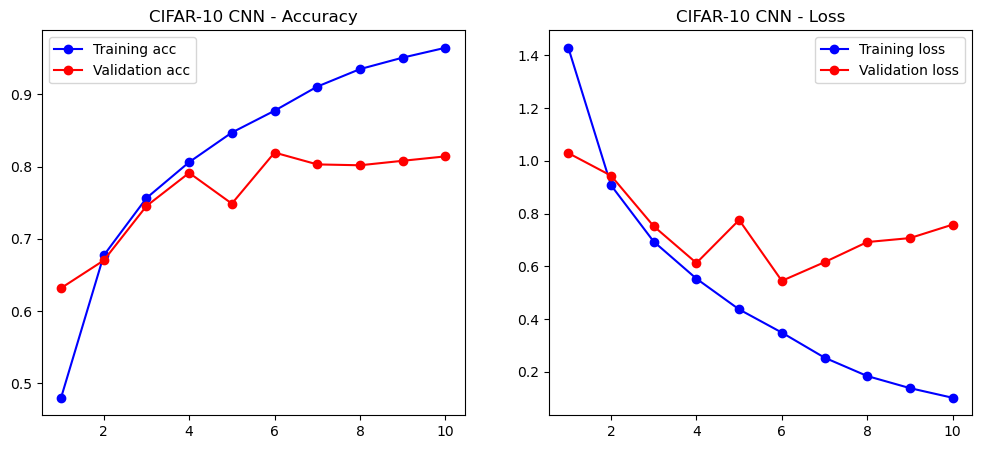

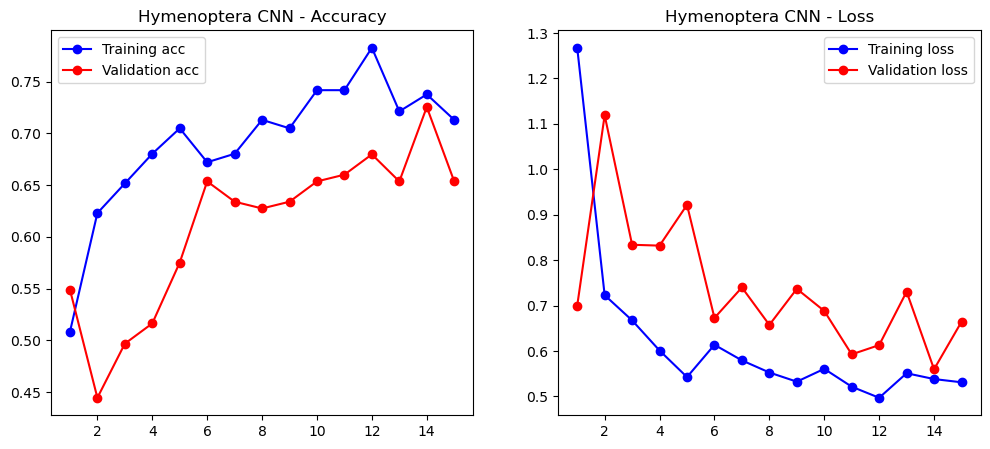

In [54]:
def plot_history(history, title="Training History"):
    acc = history['train_acc']
    val_acc = history['val_acc']
    loss = history['train_loss']
    val_loss = history['val_loss']
    epochs = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))

    # Plot Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'bo-', label='Training acc')
    plt.plot(epochs, val_acc, 'ro-', label='Validation acc')
    plt.title(f'{title} - Accuracy')
    plt.legend()

    # Plot Loss
    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'bo-', label='Training loss')
    plt.plot(epochs, val_loss, 'ro-', label='Validation loss')
    plt.title(f'{title} - Loss')
    plt.legend()

    plt.show()

# Affichage
plot_history(history_cifar, title="CIFAR-10 CNN")
plot_history(history_hym, title="Hymenoptera CNN")

In [55]:
def compute_and_plot_cm(model, loader, class_names, device, title="Matrice de Confusion"):
    """
    Génère les prédictions sur tout le dataset du loader, calcule la matrice de confusion
    et l'affiche avec Seaborn.
    """
    model.eval() # Mode évaluation (pas de dropout, pas de batchnorm update)
    all_preds = []
    all_labels = []
    
    print(f"Calcul des prédictions pour {title}...")
    
    # 1. Boucle de prédiction sur le dataset
    with torch.no_grad():
        for inputs, labels in loader:
            inputs = inputs.to(device)
            labels = labels.to(device)
            
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    # 2. Calcul de la matrice avec Scikit-learn
    cm = confusion_matrix(all_labels, all_preds)

    # 3. Affichage graphique
    plt.figure(figsize=(10, 8))
    
    # Heatmap
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=class_names, 
                yticklabels=class_names)
    
    plt.title(title)
    plt.ylabel('Vrai Label (Ground Truth)')
    plt.xlabel('Label Prédit (Prediction)')
    plt.xticks(rotation=45)
    plt.show()
    
   

Calcul des prédictions pour Confusion Matrix - CNN sur CIFAR-10...


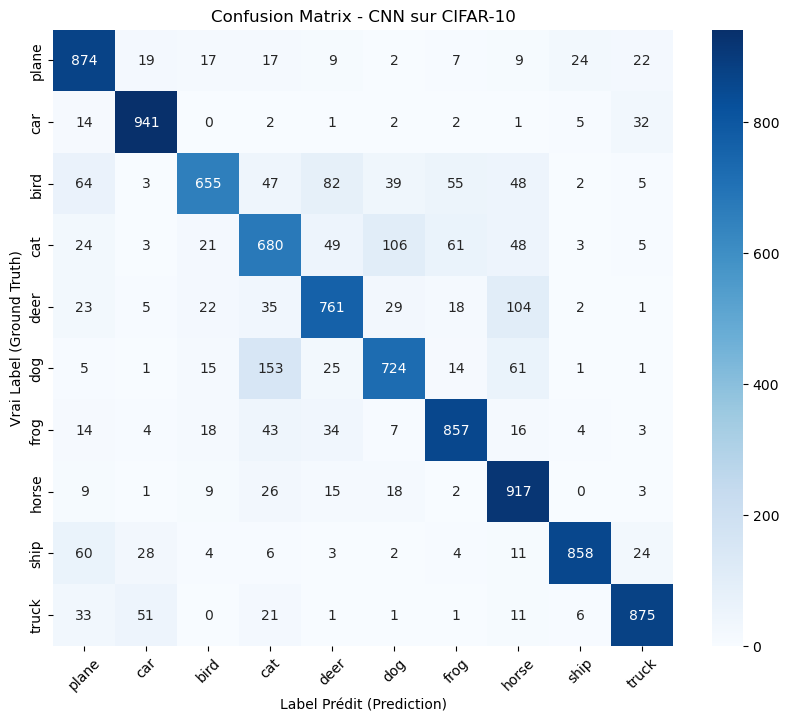

In [48]:
# 1. CIFAR-10
# Noms des classes officiels de CIFAR-10
cifar_classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# On utilise le loader de validation/test
compute_and_plot_cm(
    model=model_resnet_cifar,  # Ou votre 'model' simple VGG
    loader=val_loader_cifar, 
    class_names=cifar_classes, 
    device=device,
    title="Confusion Matrix - CNN sur CIFAR-10"
)

Calcul des prédictions pour Confusion Matrix - CNN sur Hymenoptera...


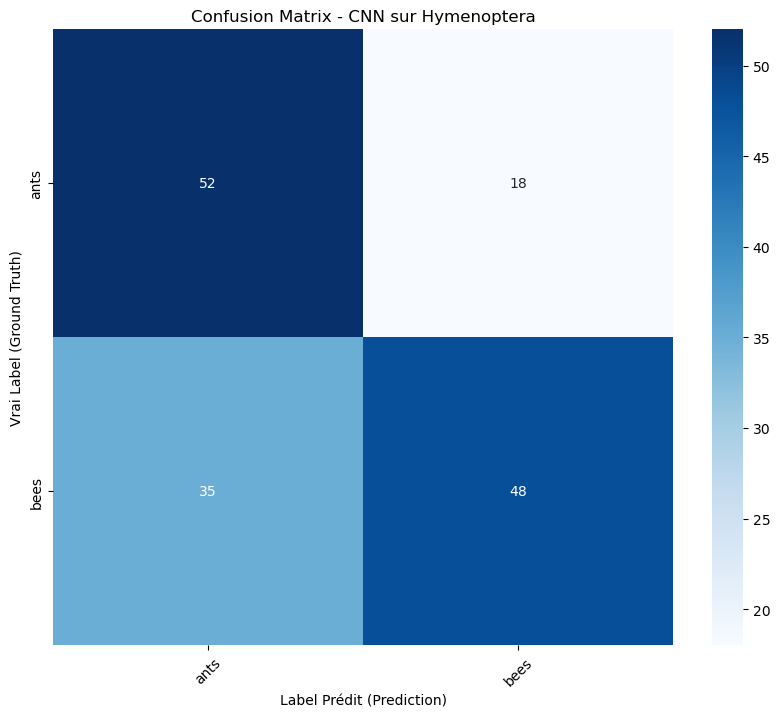

In [56]:
# 2. Hymenoptera
# Les classes ont été récupérées lors du chargement (normalement ['ants', 'bees'])
# Si la variable 'class_names' n'est plus dispo, on la recrée :
hym_classes = ['ants', 'bees'] 

compute_and_plot_cm(
    model=model_resnet_hym,  # Ou votre 'model_hymenoptera'
    loader=val_loader_hym, 
    class_names=hym_classes, 
    device=device,
    title="Confusion Matrix - CNN sur Hymenoptera"
)

# Modèle ViT

Commençons par entrainer un modèle ViT

## Explication du modèle

# Compréhension du Vision Transformer (ViT)

Le ViT est une adaptation de l'architecture Transformer (initialement conçue pour le NLP) appliquée directement aux images. C'est une architecture **Encoder-Only**.



## 1ère partie : Préparation de la donnée (Patching)

Contrairement aux CNN qui traitent les pixels via des fenêtres glissantes, le ViT traite l'image comme une séquence de morceaux.

- **Découpage :** L'image $x \in \mathbb{R}^{H \times W \times C}$ est découpée en $N$ patches de taille fixe $(P, P)$.
- **Flattening :** Chaque patch 3D est aplati en un vecteur 1D.
    - Taille d'un vecteur patch : $P \times P \times C$.
    - *Exemple :* Pour des patchs $16 \times 16$ en couleur (RGB), la dimension est $16 \times 16 \times 3 = 768$.

## 2ème partie : Linear Projection (Patch Embeddings)

C'est ici qu'intervient une astuce souvent utilisée en implémentation mais peu détaillée en théorie.

- **Projection :** Chaque vecteur aplati passe dans une couche linéaire pour être projeté dans une dimension latente constante $D$ (ex: 768 pour ViT-Base).
- **Note d'implémentation (Conv2d) :** En pratique (dans PyTorch), au lieu d'aplatir puis de faire un Linear, on utilise souvent une couche **`nn.Conv2d`**.
    - *Kernel size* = Patch size
    - *Stride* = Patch size
    - Cela revient mathématiquement au même mais est plus optimisé computationnellement.

## 3ème partie : Le Token CLS (Class Token)

C'est une spécificité des architectures type BERT/ViT.

- Le modèle ajoute un vecteur **apprenable** au tout début de la séquence de patchs : $z_{0}^0 = x_{class}$.
- **Rôle :** Comme le mécanisme d'attention mélange l'information de tous les patchs, ce token "neutre" va servir d'éponge pour agréger l'information globale de l'image. C'est lui seul qui servira à la classification finale.

## 4ème partie : Positional Embeddings

Le Transformer ne connaît pas l'ordre des séquences (contrairement au RNN/CNN). Si on mélange les patchs, le modèle voit la même chose.

- **Injection de position :** On ajoute (somme élément par élément) un vecteur de position $E_{pos}$ à chaque embedding de patch.
- **Paramètres apprenables :** Dans le ViT standard, ces vecteurs de position sont des paramètres appris pendant l'entraînement (contrairement aux sinusoïdes fixes du Transformer original).
- **Formule d'entrée de l'encodeur :**
$$z_0 = [x_{class}; x_1^p E; x_2^p E; ...; x_N^p E] + E_{pos}$$

---

# Partie Boucle : Transformer Encoder Block

Le cœur du réseau est une répétition de $L$ blocs (ex: 12 pour ViT-Base).

## 5ème partie : Multi-Head Self Attention (MSA)

Contrairement au Transformer original, le ViT utilise une architecture **Pre-Norm** (Normalisation avant l'opération).

- **Layer Norm (LN) :** On normalise la matrice d'entrée $z_{l-1}$.
- **Attention ($Q, K, V$) :**
    - On projette l'entrée vers trois matrices : Query ($Q$), Key ($K$), Value ($V$).
    - On calcule l'attention (les poids d'importance entre chaque patch).
    - Formule de l'attention :
    $$\text{Attention}(Q, K, V) = \text{softmax}\left(\frac{QK^T}{\sqrt{d_k}}\right)V$$
- **Connexion Résiduelle (Skip Connection) :** On ajoute l'entrée originale au résultat.
    - $z'_l = z_{l-1} + \text{MSA}(\text{LN}(z_{l-1}))$
- *Note :* La connexion résiduelle permet au gradient de circuler sans s'atténuer ("vanishing gradient") dans les réseaux profonds.

## 6ème partie : Feed Forward Network (MLP)

Après l'attention, l'information passe dans un petit réseau de neurones dense classique, appliqué à chaque vecteur de patch indépendamment mais de manière identique.

- **Architecture MLP :**
    1. Layer Norm (sur $z'_l$).
    2. Linear (Expansion) : Projette souvent vers une dimension $4 \times D$.
    3. **Activation GELU :** Le ViT utilise la *Gaussian Error Linear Unit* ($x \Phi(x)$) au lieu de ReLU. C'est une activation plus douce et probabiliste qui améliore souvent la convergence des Transformers.
    4. Linear (Projection) : Revient à la dimension $D$.
- **Connexion Résiduelle :**
    - Formule finale du bloc :
    $$z_l = z'_l + \text{MLP}(\text{LN}(z'_l))$$

---

# Sortie Finale (Classification Head)

À la sortie du dernier bloc $L$ :

- **Extraction :** On prend uniquement le premier vecteur de la séquence, correspondant au **Token CLS** ($z_L^0$).
- **Normalisation :** Une dernière Layer Norm est appliquée.
- **MLP Head :** Une couche linéaire projette ce vecteur vers le nombre de classes (Logits).
- **Softmax :** Conversion des logits en probabilités.
$$y = \text{Softmax}(\text{Linear}(\text{LN}(z_L^0)))$$

## Déclaration de la classe ViT

In [52]:
#Classes nécessaire

#Embeddings pour le ViT
class PatchEmbedding(nn.Module):

    def __init__(self, img_size=224, patch_size=16, in_channels=3, embed_dim=768):
        super().__init__()
        self.img_size = img_size
        self.patch_size = patch_size
        self.n_patches = (img_size // patch_size) ** 2

        self.proj = nn.Conv2d(
            in_channels,
            embed_dim,
            kernel_size=patch_size,
            stride=patch_size
        )
    def forward(self, x):
        # x: (B, C, H, W)
        x = self.proj(x)  
        x = x.flatten(2)  
        x = x.transpose(1, 2)  
        return x

class MLP(nn.Module):
    def __init__(self, embed_dim=768, mlp_ratio=4.0, dropout=0.1):
        super().__init__()
        hidden_dim = int(embed_dim * mlp_ratio)
        self.fc1 = nn.Linear(embed_dim, hidden_dim)
        self.act = nn.GELU()
        self.fc2 = nn.Linear(hidden_dim, embed_dim)
        self.dropout = nn.Dropout(dropout)

    def forward(self, x):
        x = self.fc1(x)
        x = self.act(x)
        x = self.dropout(x)
        x = self.fc2(x)
        x = self.dropout(x)
        return x

#Suit l'architecture du transformer/encoder
class TransformerBlock(nn.Module):
    def __init__(self, embed_dim=768, n_heads=12, mlp_ratio=4.0, dropout=0.1):
        super().__init__()
        self.norm1 = nn.LayerNorm(embed_dim)
        self.attn = nn.MultiheadAttention(embed_dim, n_heads, dropout=dropout, batch_first=True)
        # Normalisation avant le MLP
        self.norm2 = nn.LayerNorm(embed_dim)
        # MLP
        hidden_features = int(embed_dim * mlp_ratio)
        self.mlp = nn.Sequential(
            nn.Linear(embed_dim, hidden_features),
            nn.GELU(),
            nn.Dropout(dropout),
            nn.Linear(hidden_features, embed_dim),
            nn.Dropout(dropout)
        )

    def forward(self, x):
        
        residual = x
        x = self.norm1(x)
        # auto-attention: query=x, key=x, value=x
        x, weights = self.attn(x, x, x, need_weights=True) 

        x = residual + x

        residual = x
        x = self.norm2(x)
        x = self.mlp(x)
        x = residual + x

        return x

In [53]:
#Modèle ViT
class ViT(nn.Module):

    def __init__(
        self,
        img_size=224,
        patch_size=16,
        in_channels=3,
        n_classes=1000,
        embed_dim=768,
        depth=12,
        n_heads=12,
        mlp_ratio=4.0,
        dropout=0.1,
        emb_dropout=0.1
    ):
        super().__init__()

        # Patch embedding
        self.patch_embed = PatchEmbedding(img_size, patch_size, in_channels, embed_dim)
        n_patches = self.patch_embed.n_patches

        # Class token (token spécial pour la classification)
        #Utile nn.parameter pour préciser qu'ils doivent etre entrainés
        self.cls_token = nn.Parameter(torch.zeros(1, 1, embed_dim))

        # Position embedding
        self.pos_embed = nn.Parameter(torch.zeros(1, n_patches + 1, embed_dim))

        # Transformer blocks
        self.blocks = nn.ModuleList([
            TransformerBlock(embed_dim, n_heads, mlp_ratio, dropout)
            for _ in range(depth)
        ])

        # Classification head
        self.norm = nn.LayerNorm(embed_dim)
        self.head = nn.Linear(embed_dim, n_classes)

        # Initialisation des poids (on remplit les vecteurs de positions et token avec une distribution normale pour arriver à identifier les autres)
        #Trunc est pour couper les valeurs extèmes
        nn.init.trunc_normal_(self.pos_embed, std=0.02)
        nn.init.trunc_normal_(self.cls_token, std=0.02)
        self.apply(self._init_weights)

    def _init_weights(self, m):
        if isinstance(m, nn.Linear):
            nn.init.trunc_normal_(m.weight, std=0.02)
            if m.bias is not None:
                nn.init.constant_(m.bias, 0)
        elif isinstance(m, nn.LayerNorm):
            nn.init.constant_(m.bias, 0)
            nn.init.constant_(m.weight, 1.0)

    def forward(self, x):
        B = x.shape[0] #Récupère le nombre d'images
        # Patch embedding
        x = self.patch_embed(x)  # (B, n_patches, embed_dim)

        # Ajout du class token
        cls_token = self.cls_token.expand(B, -1, -1)  # (B, 1, embed_dim)
        x = torch.cat([cls_token, x], dim=1)  # (B, n_patches+1, embed_dim)

        # Ajout du position embedding
        x = x + self.pos_embed

        # Transformer blocks
        for block in self.blocks:
            x = block(x)

        # Classification (utilise uniquement le class token)
        x = self.norm(x)
        x = x[:, 0]  # Prend le class token
        x = self.head(x)

        return x

## CIFAR10

In [57]:
print(f"Entraînement sur : {device}")

# --- Configuration "ViT-Tiny" ---
# On réduit la taille pour que ça apprenne plus vite sur nos petits datasets
VIT_CONFIG = {
    'img_size': 224,      # Standard ViT
    'patch_size': 16,     # Standard ViT
    'embed_dim': 384,     # Réduit (au lieu de 768)
    'depth': 6,           # Réduit (au lieu de 12)
    'n_heads': 6,         # Réduit (au lieu de 12)
    'mlp_ratio': 4.0,
    'dropout': 0.1
}

# 1. Modèle pour CIFAR-10 (10 Classes)
model_vit_cifar = ViT(
    **VIT_CONFIG,
    in_channels=3,
    n_classes=10
).to(device)

# 2. Modèle pour Hymenoptera (2 Classes)
model_vit_hym = ViT(
    **VIT_CONFIG,
    in_channels=3,
    n_classes=2
).to(device)

print("Modèles ViT initialisés.")

Entraînement sur : cuda
Modèles ViT initialisés.


In [58]:
# Fonction pour créer un DataLoader qui resize à la volée (plus économe en RAM)
class ResizedTensorDataset(torch.utils.data.Dataset):
    def __init__(self, x_tensor, y_tensor, target_size=(224, 224)):
        self.x = x_tensor
        self.y = y_tensor
        self.target_size = target_size

    def __len__(self):
        return len(self.x)

    def __getitem__(self, idx):
        img = self.x[idx] # (3, 32, 32)
        label = self.y[idx]
        
        # Upscale bilinéaire à 224x224 juste avant d'envoyer au modèle
        img = F.interpolate(img.unsqueeze(0), size=self.target_size, mode='bilinear', align_corners=False).squeeze(0)
        return img, label

# --- Création des Loaders CIFAR (Upscalés pour ViT) ---
# On utilise vos tenseurs x_train_cifar10 existants (qui sont en 32x32)
ds_train_vit_cifar = ResizedTensorDataset(x_train_cifar10, y_train_cifar10)
ds_val_vit_cifar   = ResizedTensorDataset(x_val_cifar10, y_val_cifar10)

loader_vit_cifar_train = DataLoader(ds_train_vit_cifar, batch_size=64, shuffle=True)
loader_vit_cifar_val   = DataLoader(ds_val_vit_cifar, batch_size=64, shuffle=False)

# --- Création des Loaders Hymenoptera (Déjà en 224x224) ---
# Pas besoin de la classe spéciale, ils sont déjà à la bonne taille
ds_train_hym = TensorDataset(x_train_hymenoptera, y_train_hymenoptera)
ds_val_hym   = TensorDataset(x_test_hymenoptera, y_test_hymenoptera) # Rappel : on a cloné val dans test

loader_vit_hym_train = DataLoader(ds_train_hym, batch_size=32, shuffle=True)
loader_vit_hym_val   = DataLoader(ds_val_hym, batch_size=32, shuffle=False)

print("DataLoaders ViT prêts (CIFAR upscalé à 224x224).")

DataLoaders ViT prêts (CIFAR upscalé à 224x224).


In [ ]:
# --- Entraînement CIFAR-10 ---
print("\n=== ViT sur CIFAR-10 ===")

save_path = "vit_cifar10_weights.pth"
optimizer_vit_cifar = optim.AdamW(model_vit_cifar.parameters(), lr=1e-4, weight_decay=1e-2)
criterion = torch.nn.CrossEntropyLoss()

# VÉRIFICATION DU FICHIER
if os.path.exists(save_path):
    print(f"--> Fichier de poids trouvé : '{save_path}'")
    print("--> Chargement du modèle... (Entraînement ignoré)")
    
    # Chargement des poids
    model_vit_cifar.load_state_dict(torch.load(save_path, map_location=device))
    
    # Création d'un historique vide pour ne pas faire planter les cellules de plot suivantes
    # (Note : Les courbes seront vides, mais le code continuera)
    history_vit_cifar = {'train_loss': [], 'train_acc': [], 'val_loss': [], 'val_acc': [0.0]}
    
else:
    print("--> Aucun fichier de poids trouvé. Démarrage de l'entraînement...")
    
    history_vit_cifar = train_model(
        model=model_vit_cifar,
        train_loader=loader_vit_cifar_train,
        val_loader=loader_vit_cifar_val,
        criterion=criterion,
        optimizer=optimizer_vit_cifar,
        num_epochs=10, 
        device=device
    )
    
    # SAUVEGARDE
    torch.save(model_vit_cifar.state_dict(), save_path)
    print(f"Modèle sauvegardé sous : {save_path}")


=== ViT sur CIFAR-10 ===
Démarrage de l'entraînement sur cuda pour 10 epochs
Epoch [1/10] Train Loss: 1.8070 Acc: 0.3160 | Val Loss: 1.5523 Acc: 0.4233
Epoch [2/10] Train Loss: 1.4447 Acc: 0.4653 | Val Loss: 1.3161 Acc: 0.5189
Epoch [3/10] Train Loss: 1.2902 Acc: 0.5276 | Val Loss: 1.2682 Acc: 0.5307
Epoch [4/10] Train Loss: 1.2095 Acc: 0.5595 | Val Loss: 1.1981 Acc: 0.5713
Epoch [5/10] Train Loss: 1.1438 Acc: 0.5861 | Val Loss: 1.1389 Acc: 0.5889
Epoch [6/10] Train Loss: 1.0924 Acc: 0.6058 | Val Loss: 1.1029 Acc: 0.6058
Epoch [7/10] Train Loss: 1.0448 Acc: 0.6235 | Val Loss: 1.0757 Acc: 0.6159
Epoch [8/10] Train Loss: 0.9971 Acc: 0.6403 | Val Loss: 1.0775 Acc: 0.6150
Epoch [9/10] Train Loss: 0.9571 Acc: 0.6555 | Val Loss: 1.0243 Acc: 0.6304
Epoch [10/10] Train Loss: 0.9280 Acc: 0.6654 | Val Loss: 1.0486 Acc: 0.6253
Entraînement terminé en 34m 47s


In [61]:
# --- SAUVEGARDE DES POIDS ---
# On définit un nom de fichier explicite
save_path = "vit_cifar10_weights.pth"

# On sauvegarde uniquement les paramètres (state_dict), pas l'architecture entière
torch.save(model_vit_cifar.state_dict(), save_path)
print(f"Modèle sauvegardé avec succès sous : {save_path}")

Modèle sauvegardé avec succès sous : vit_cifar10_weights.pth


In [ ]:
# --- Entraînement Hymenoptera ---
print("\n=== ViT sur Hymenoptera ===")
optimizer_vit_hym = optim.AdamW(model_vit_hym.parameters(), lr=1e-4, weight_decay=1e-2)

history_vit_hym = train_model(
    model=model_vit_hym,
    train_loader=loader_vit_hym_train,
    val_loader=loader_vit_hym_val,
    criterion=criterion,
    optimizer=optimizer_vit_hym,
    num_epochs=15, # Dataset petit, ça va vite
    device=device
)


=== ViT sur Hymenoptera ===
Démarrage de l'entraînement sur cuda pour 15 epochs
Epoch [1/15] Train Loss: 1.0152 Acc: 0.5984 | Val Loss: 0.6972 Acc: 0.4837
Epoch [2/15] Train Loss: 0.7195 Acc: 0.5205 | Val Loss: 0.6864 Acc: 0.5425
Epoch [3/15] Train Loss: 0.7092 Acc: 0.5000 | Val Loss: 0.6899 Acc: 0.5556
Epoch [4/15] Train Loss: 0.6852 Acc: 0.5451 | Val Loss: 0.6909 Acc: 0.5163
Epoch [5/15] Train Loss: 0.6776 Acc: 0.5943 | Val Loss: 0.6896 Acc: 0.5229
Epoch [6/15] Train Loss: 0.6701 Acc: 0.6107 | Val Loss: 0.6901 Acc: 0.4967
Epoch [7/15] Train Loss: 0.6656 Acc: 0.6107 | Val Loss: 0.6868 Acc: 0.5359
Epoch [8/15] Train Loss: 0.6536 Acc: 0.6270 | Val Loss: 0.6883 Acc: 0.5490
Epoch [9/15] Train Loss: 0.6368 Acc: 0.6475 | Val Loss: 0.6841 Acc: 0.5948
Epoch [10/15] Train Loss: 0.6287 Acc: 0.6393 | Val Loss: 0.7386 Acc: 0.5229
Epoch [11/15] Train Loss: 0.6345 Acc: 0.6557 | Val Loss: 0.6754 Acc: 0.6536
Epoch [12/15] Train Loss: 0.5989 Acc: 0.7049 | Val Loss: 0.6900 Acc: 0.5817
Epoch [13/15] Tr

In [62]:
# --- SAUVEGARDE DES POIDS ---
# On définit un nom de fichier explicite
save_path = "vit_hym_weights.pth"

# On sauvegarde uniquement les paramètres (state_dict), pas l'architecture entière
torch.save(model_vit_hym.state_dict(), save_path)
print(f"Modèle sauvegardé avec succès sous : {save_path}")

Modèle sauvegardé avec succès sous : vit_hym_weights.pth


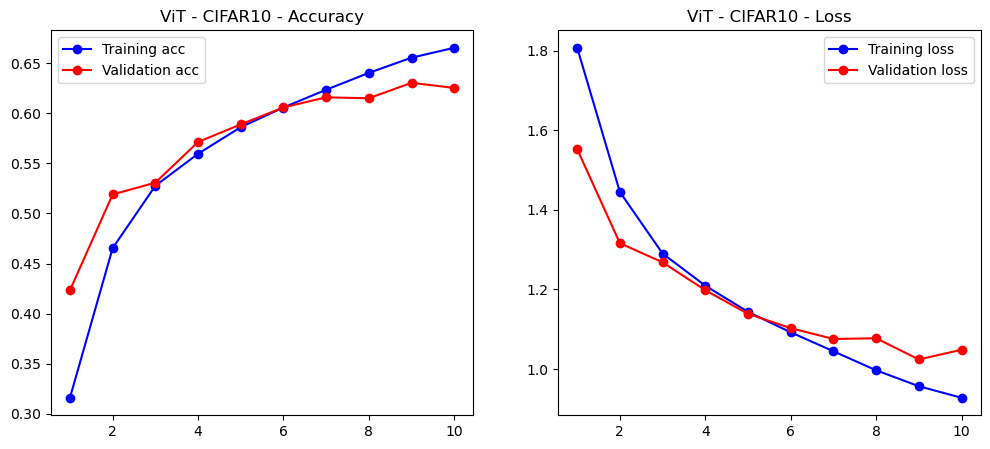

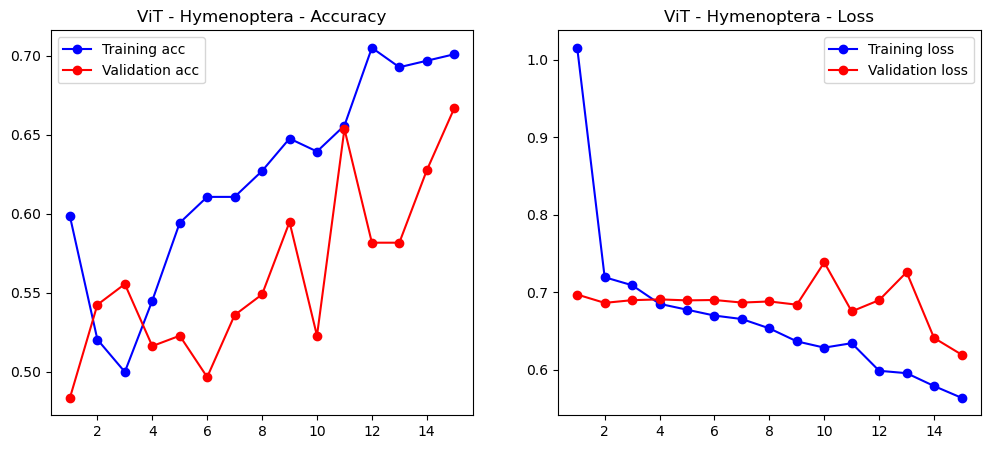

Calcul des prédictions pour ViT Confusion - CIFAR...


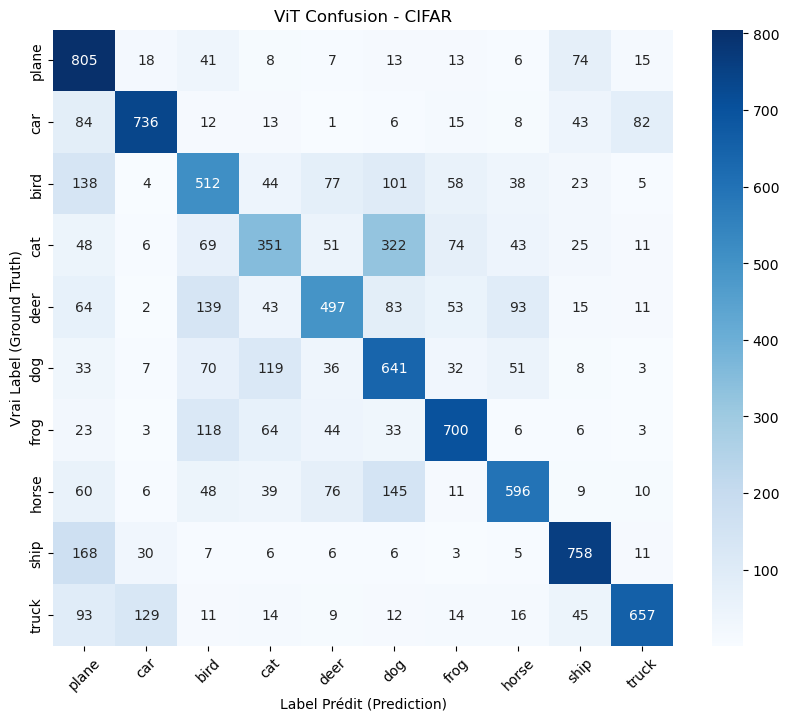

Calcul des prédictions pour ViT Confusion - Hymenoptera...


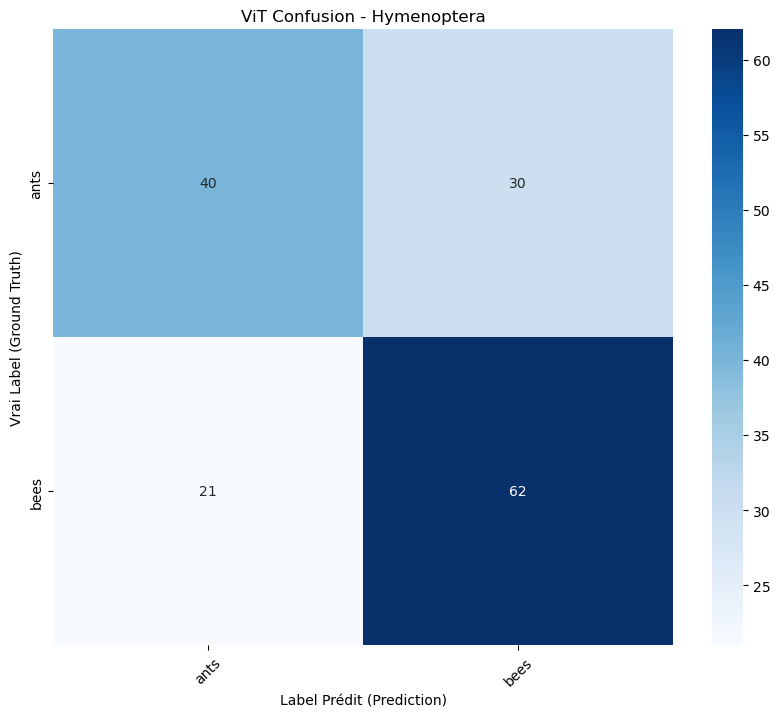

In [63]:
# Affichage des courbes
plot_history(history_vit_cifar, title="ViT - CIFAR10")
plot_history(history_vit_hym, title="ViT - Hymenoptera")

# Matrices de confusion
cifar_classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
hym_classes = ['ants', 'bees']

compute_and_plot_cm(model_vit_cifar, loader_vit_cifar_val, cifar_classes, device, title="ViT Confusion - CIFAR")
compute_and_plot_cm(model_vit_hym, loader_vit_hym_val, hym_classes, device, title="ViT Confusion - Hymenoptera")

# Comparaison des modèles

In [65]:
import torch
import time
import copy
import pandas as pd
from thop import profile

class BudgetAnalyzer:
    def __init__(self, device):
        self.device = device

    def get_flops_params(self, model, input_shape=(1, 3, 32, 32)):
        """ Calcule les FLOPs d'inférence et le nombre de paramètres """
        model_cpu = copy.deepcopy(model).cpu()
        model_cpu.eval()
        dummy_input = torch.randn(input_shape)
        try:
            # macs = Multiply-Accumulate. 1 MAC ≈ 2 FLOPs
            macs, params = profile(model_cpu, inputs=(dummy_input, ), verbose=False)
            flops_giga = (2 * macs) / 1e9
            params_million = params / 1e6
            return flops_giga, params_million
        except Exception as e:
            print(f"Erreur THOP: {e}")
            return 0, 0


    def measure_peak_memory(self, model, input_shape=(1, 3, 32, 32), mode='inference'):
        """ Mesure le pic de mémoire VRAM utilisé """
        if self.device.type != 'cuda': return 0

        torch.cuda.reset_peak_memory_stats()
        torch.cuda.empty_cache()

        model.to(self.device)
        dummy_input = torch.randn(input_shape).to(self.device)

        if mode == 'train':
            model.train()
            optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
            optimizer.zero_grad()
            loss = model(dummy_input).sum()
            loss.backward() # C'est là que la mémoire explose
            optimizer.step()
        else:
            model.eval()
            with torch.no_grad():
                _ = model(dummy_input)

        peak_bytes = torch.cuda.max_memory_allocated(self.device)
        return peak_bytes / (1024**2) # En MB

    def analyze_model(self, model, model_name, train_dataset_size, test_dataset_size, epochs, measured_train_time=None):
        """
        Génère le rapport complet.
        measured_train_time : Si vous avez mesuré le temps réel pendant votre boucle, passez-le ici.
                              Sinon, il sera estimé (moins précis).
        """
        results = {'Model': model_name}
        input_shape = (1, 3, 32, 32) # Une seule image
        batch_shape = (64, 3, 32, 32) # Pour simuler la mémoire batch

        print(f"Analyse de {model_name}...")

        # 1. FLOPs & Params
        flops, params = self.get_flops_params(model, input_shape)
        results['Params (M)'] = params
        results['Inference FLOPs (G)'] = flops
        # Estimation FLOPs Train: 3 * Inference * Nb_Images * Nb_Epoques
        results['Train FLOPs (P)'] = (3 * flops * train_dataset_size * epochs) / 1e6

        # 2. Mémoire (VRAM)
        results['Mem Test (MB)'] = self.measure_peak_memory(model, input_shape, mode='inference')
        # Pour le train, on mesure avec un batch de 64 (plus réaliste)
        results['Mem Train (MB)'] = self.measure_peak_memory(model, batch_shape, mode='train')

        # 3. Temps (Time)
        # Temps Test (Total pour tout le dataset de test)
        sec_per_img = self.measure_time(model, input_shape, mode='inference')
        results['Time Test Total (s)'] = sec_per_img * test_dataset_size

        # Temps Train (Total)
        if measured_train_time is not None:
            results['Time Train Total (min)'] = measured_train_time / 60
        else:
            # Estimation si non fourni (moins précis car ignore le chargement des données)
            sec_per_batch = self.measure_time(model, batch_shape, mode='train')
            batches_per_epoch = train_dataset_size / 64
            total_sec = sec_per_batch * batches_per_epoch * epochs
            results['Time Train Total (min)'] = total_sec / 60

        return results

In [67]:
def compare_models(models_dict, input_shapes_dict, accuracies_dict, train_times_dict, test_times_dict, device):
    """
    Compare plusieurs modèles sur différentes métriques
    """
    analyzer = BudgetAnalyzer(device)

    print("=" * 140)
    print("COMPARAISON DES MODÈLES")
    print("=" * 140)
    print()

    results = {}

    for model_name, model in models_dict.items():
        print(f"Analyse de {model_name}...")

        # Récupère l'input shape spécifique au modèle
        input_shape = input_shapes_dict.get(model_name)
        if input_shape is None:
            print(f"  Aucune input_shape fournie pour {model_name}, utilisation par défaut (1, 3, 32, 32)")
            input_shape = (1, 3, 32, 32)
        else:
            print(f"  Input shape: {input_shape}")

        # Calcul des FLOPs et paramètres
        flops, params = analyzer.get_flops_params(model, input_shape)

        # Mémoire en inférence
        mem_inference = analyzer.measure_peak_memory(model, input_shape, mode='inference')

        # Mémoire en entraînement
        mem_train = analyzer.measure_peak_memory(model, input_shape, mode='train')

        # Récupérer l'accuracy
        test_acc = accuracies_dict.get(model_name, 0)
        if test_acc < 1:
            test_acc = test_acc * 100

        # Récupérer les temps
        train_time = train_times_dict.get(model_name, 0)
        test_time = test_times_dict.get(model_name, 0)

        results[model_name] = {
            'input_shape': input_shape,
            'test_accuracy': test_acc,
            'flops_giga': flops,
            'params_million': params,
            'memory_inference_mb': mem_inference,
            'memory_train_mb': mem_train,
            'train_time_s': train_time,
            'test_time_s': test_time
        }

        print(f"  ✓ Test Accuracy: {test_acc:.2f}%")
        print(f"  ✓ FLOPs: {flops:.2f} GFLOPs")
        print(f"  ✓ Paramètres: {params:.2f} M")
        print(f"  ✓ Mémoire (inférence): {mem_inference:.2f} MB")
        print(f"  ✓ Mémoire (entraînement): {mem_train:.2f} MB")
        print(f"  ✓ Temps d'entraînement: {train_time:.2f}s")
        print(f"  ✓ Temps de test: {test_time:.2f}s")
        print()

    # Tableau récapitulatif
    print("=" * 140)
    print("TABLEAU RÉCAPITULATIF")
    print("=" * 140)
    print(f"{'Modèle':<20} {'Input Shape':<18} {'Acc (%)':<12} {'FLOPs (G)':<12} {'Params (M)':<12} "
          f"{'Mem Inf (MB)':<15} {'Mem Train (MB)':<15} {'Train Time (s)':<15} {'Test Time (s)':<15}")
    print("-" * 140)

    for model_name, metrics in results.items():
        shape_str = str(metrics['input_shape'])
        print(f"{model_name:<20} {shape_str:<18} {metrics['test_accuracy']:<12.2f} {metrics['flops_giga']:<12.2f} "
              f"{metrics['params_million']:<12.2f} {metrics['memory_inference_mb']:<15.2f} "
              f"{metrics['memory_train_mb']:<15.2f} {metrics['train_time_s']:<15.2f} {metrics['test_time_s']:<15.2f}")

    print("=" * 140)

    return results




In [71]:
# =========================================================
# COMPARAISON GLOBALE : CNN (ResNet) vs ViT
# =========================================================

# 1. Récupération sécurisée des accuracies
# (On met 0.0 par défaut si l'historique n'est pas trouvé dans les variables)
def get_acc(var_name, local_vars):
    if var_name in local_vars:
        # On prend la dernière valeur de validation (val_acc)
        return local_vars[var_name]['val_acc'][-1]
    return 0.0

# 2. Récupération avec les BONS noms de variables (tels qu'utilisés lors du training)
# CNN / ResNet
acc_resnet_cifar = get_acc('history_cifar', locals())      # C'était history_cifar
acc_resnet_hym   = get_acc('history_hym', locals())        # C'était history_hym

# ViT
acc_vit_cifar    = get_acc('history_vit_cifar', locals())
acc_vit_hym      = get_acc('history_vit_hym', locals())

# --- Option de Secours (Si vous avez redémarré le noyau et perdu les variables history) ---
# Si vous avez 0 partout, décommentez et remplissez ces lignes manuellement avec vos souvenirs :
# acc_resnet_cifar = 0.75  # Exemple 75%
# acc_resnet_hym   = 0.60
# acc_vit_cifar    = 0.55
# acc_vit_hym      = 0.50

print(f"Accuracies récupérées :")
print(f"CNN Cifar: {acc_resnet_cifar:.2%}")
print(f"CNN Hym  : {acc_resnet_hym:.2%}")
print(f"ViT Cifar: {acc_vit_cifar:.2%}")
print(f"ViT Hym  : {acc_vit_hym:.2%})")

# 2. Dictionnaire des Modèles à comparer
models_dict = {
    'ResNet_CIFAR10': model_resnet_cifar,
    'ResNet_Hymenoptera': model_resnet_hym,
    'ViT_CIFAR10': model_vit_cifar,
    'ViT_Hymenoptera': model_vit_hym
}

# 3. Input Shapes (Crucial pour le calcul des FLOPs)
input_shapes_dict = {
    # Le ResNet/CNN prend l'image native
    'ResNet_CIFAR10': (1, 3, 32, 32),
    'ResNet_Hymenoptera': (1, 3, 224, 224),
    
    # Le ViT a besoin de 224x224 (via upscaling pour CIFAR)
    'ViT_CIFAR10': (1, 3, 224, 224),
    'ViT_Hymenoptera': (1, 3, 224, 224)
}

# 4. Accuracies
accuracies_dict = {
    'ResNet_CIFAR10': acc_resnet_cifar,
    'ResNet_Hymenoptera': acc_resnet_hym,
    'ViT_CIFAR10': acc_vit_cifar,
    'ViT_Hymenoptera': acc_vit_hym
}

# 5. Temps (A remplir si tu les as, sinon 0)
train_times_dict = {
    'ResNet_CIFAR10': 3*60+56.1, 'ResNet_Hymenoptera': 60+50.1,
    'ViT_CIFAR10': 34*60+47, 'ViT_Hymenoptera': 20.1
}

test_times_dict = {
    'ResNet_CIFAR10': 0, 'ResNet_Hymenoptera': 0,
    'ViT_CIFAR10': 0, 'ViT_Hymenoptera': 0
}

# =========================================================
# LANCEMENT DE L'ANALYSE
# =========================================================
results = compare_models(
    models_dict=models_dict,
    input_shapes_dict=input_shapes_dict,
    accuracies_dict=accuracies_dict,
    train_times_dict=train_times_dict,
    test_times_dict=test_times_dict,
    device=device
)

Accuracies récupérées :
CNN Cifar: 81.42%
CNN Hym  : 65.36%
ViT Cifar: 62.53%
ViT Hym  : 66.67%)
COMPARAISON DES MODÈLES

Analyse de ResNet_CIFAR10...
  Input shape: (1, 3, 32, 32)
  ✓ Test Accuracy: 81.42%
  ✓ FLOPs: 1.12 GFLOPs
  ✓ Paramètres: 11.17 M
  ✓ Mémoire (inférence): 893.36 MB
  ✓ Mémoire (entraînement): 887.97 MB
  ✓ Temps d'entraînement: 236.10s
  ✓ Temps de test: 0.00s

Analyse de ResNet_Hymenoptera...
  Input shape: (1, 3, 224, 224)
  ✓ Test Accuracy: 65.36%
  ✓ FLOPs: 54.67 GFLOPs
  ✓ Paramètres: 11.17 M
  ✓ Mémoire (inférence): 945.97 MB
  ✓ Mémoire (entraînement): 1098.55 MB
  ✓ Temps d'entraînement: 110.10s
  ✓ Temps de test: 0.00s

Analyse de ViT_CIFAR10...
  Input shape: (1, 3, 224, 224)
  ✓ Test Accuracy: 62.53%
  ✓ FLOPs: 2.91 GFLOPs
  ✓ Paramètres: 7.40 M
  ✓ Mémoire (inférence): 888.30 MB
  ✓ Mémoire (entraînement): 892.04 MB
  ✓ Temps d'entraînement: 2087.00s
  ✓ Temps de test: 0.00s

Analyse de ViT_Hymenoptera...
  Input shape: (1, 3, 224, 224)
  ✓ Test Accur

## Interprétabilité ViT

In [ ]:
class ViTInterpreter:
    def __init__(self, model, device):
        self.model = model
        self.device = device
        self.attention_maps = []

    def hook_attention(self):
        """Enregistre les attention maps de chaque couche"""
        self.attention_maps = []
        hooks = []

        def get_attention(module, input, output):
            # Pour nn.MultiheadAttention, on doit capturer avec need_weights=True
            # On va modifier temporairement le comportement
            pass

        # Pour ton architecture, on doit intercepter différemment
        # On va patcher les blocs transformer
        original_forwards = []

        for block in self.model.blocks:
            original_forward = block.forward
            original_forwards.append(original_forward)

            def make_new_forward(orig_forward, attn_module):
                def new_forward(x):
                    residual = x
                    x = block.norm1(x)
                    # Force need_weights=True pour capturer l'attention
                    x, attn_weights = attn_module(x, x, x, need_weights=True, average_attn_weights=False)
                    self.attention_maps.append(attn_weights.detach().cpu())
                    x = residual + x

                    residual = x
                    x = block.norm2(x)
                    x = block.mlp(x)
                    x = residual + x
                    return x
                return new_forward

            block.forward = make_new_forward(original_forward, block.attn)

        return original_forwards

    def restore_forwards(self, original_forwards):
        """Restaure les forward originaux"""
        for block, orig_forward in zip(self.model.blocks, original_forwards):
            block.forward = orig_forward

    def visualize_attention(self, image, class_names=None, layer_idx=-1, head_idx=0):
        """
        Visualise l'attention du modèle

        Args:
            image: Image tensor (1, C, H, W) ou (C, H, W)
            class_names: Liste des noms de classes
            layer_idx: Quelle couche visualiser (-1 = dernière)
            head_idx: Quelle tête d'attention visualiser
        """
        self.model.eval()

        # Prépare l'image
        if image.dim() == 3:
            image = image.unsqueeze(0)
        image = image.to(self.device)

        # Enregistre les attentions
        original_forwards = self.hook_attention()

        # Forward pass
        with torch.no_grad():
            output = self.model(image)
            pred_class = output.argmax(dim=1).item()
            confidence = F.softmax(output, dim=1)[0, pred_class].item()

        # Restaure les forwards originaux
        self.restore_forwards(original_forwards)

        # Récupère l'attention de la couche sélectionnée
        if len(self.attention_maps) == 0:
            print(" Aucune attention map capturée. Vérifie l'architecture du modèle.")
            return

        attn = self.attention_maps[layer_idx]  # (batch, n_heads, n_patches+1, n_patches+1)
        attn = attn[0, head_idx]  # Sélectionne la tête (n_patches+1, n_patches+1)

        # L'attention du token CLS vers les patches
        attn_cls = attn[0, 1:]  # Ignore le CLS token lui-même (n_patches,)

        # Reshape en grille 2D
        n_patches = int(np.sqrt(attn_cls.shape[0]))
        attn_map = attn_cls.reshape(n_patches, n_patches).numpy()

        # Visualisation
        fig, axes = plt.subplots(1, 3, figsize=(15, 5))

        # Image originale
        img_display = image[0].cpu().permute(1, 2, 0).numpy()
        if img_display.shape[2] == 1:
            img_display = img_display.squeeze()
            axes[0].imshow(img_display, cmap='gray')
        else:
            # Normalise pour affichage si nécessaire
            img_display = (img_display - img_display.min()) / (img_display.max() - img_display.min())
            axes[0].imshow(img_display)
        axes[0].set_title('Image originale')
        axes[0].axis('off')

        # Attention map
        im = axes[1].imshow(attn_map, cmap='hot', interpolation='nearest')
        axes[1].set_title(f'Attention Map\nCouche {layer_idx}, Tête {head_idx}')
        axes[1].axis('off')
        plt.colorbar(im, ax=axes[1])

        # Superposition
        attn_resized = F.interpolate(
            torch.from_numpy(attn_map).unsqueeze(0).unsqueeze(0),
            size=(image.shape[2], image.shape[3]),
            mode='bilinear',
            align_corners=False
        )[0, 0].numpy()

        if img_display.ndim == 2:
            axes[2].imshow(img_display, cmap='gray')
        else:
            axes[2].imshow(img_display)
        axes[2].imshow(attn_resized, cmap='hot', alpha=0.5)

        pred_label = class_names[pred_class] if class_names else f"Classe {pred_class}"
        axes[2].set_title(f'Superposition\nPrédiction: {pred_label}\nConfiance: {confidence:.1%}')
        axes[2].axis('off')

        plt.tight_layout()
        plt.show()

        return attn_map

    def visualize_all_heads(self, image, class_names=None, layer_idx=-1):
        """Visualise toutes les têtes d'attention d'une couche"""
        self.model.eval()

        if image.dim() == 3:
            image = image.unsqueeze(0)
        image = image.to(self.device)

        original_forwards = self.hook_attention()

        with torch.no_grad():
            output = self.model(image)
            pred_class = output.argmax(dim=1).item()
            confidence = F.softmax(output, dim=1)[0, pred_class].item()

        self.restore_forwards(original_forwards)

        if len(self.attention_maps) == 0:
            print("Aucune attention map capturée.")
            return

        attn = self.attention_maps[layer_idx][0]  # (n_heads, n_patches+1, n_patches+1)
        n_heads = attn.shape[0]
        n_patches = int(np.sqrt(attn.shape[1] - 1))

        # Calcule la grille
        cols = min(4, n_heads)
        rows = (n_heads + cols - 1) // cols

        fig, axes = plt.subplots(rows, cols, figsize=(4*cols, 4*rows))
        if rows == 1:
            axes = axes.reshape(1, -1)
        axes = axes.flatten()

        for head_idx in range(n_heads):
            attn_head = attn[head_idx, 0, 1:]  # CLS vers patches
            attn_map = attn_head.reshape(n_patches, n_patches).numpy()

            im = axes[head_idx].imshow(attn_map, cmap='hot', interpolation='nearest')
            axes[head_idx].set_title(f'Tête {head_idx}')
            axes[head_idx].axis('off')
            plt.colorbar(im, ax=axes[head_idx], fraction=0.046, pad=0.04)

        # Cache les axes vides
        for idx in range(n_heads, len(axes)):
            axes[idx].axis('off')

        pred_label = class_names[pred_class] if class_names else f"Classe {pred_class}"
        fig.suptitle(f'Toutes les têtes - Couche {layer_idx}\nPrédiction: {pred_label} (Confiance: {confidence:.1%})',
                     fontsize=16, y=0.98)
        plt.tight_layout()
        plt.show()


--- Analyse ViT CIFAR-10 ---
Vraie classe : bird


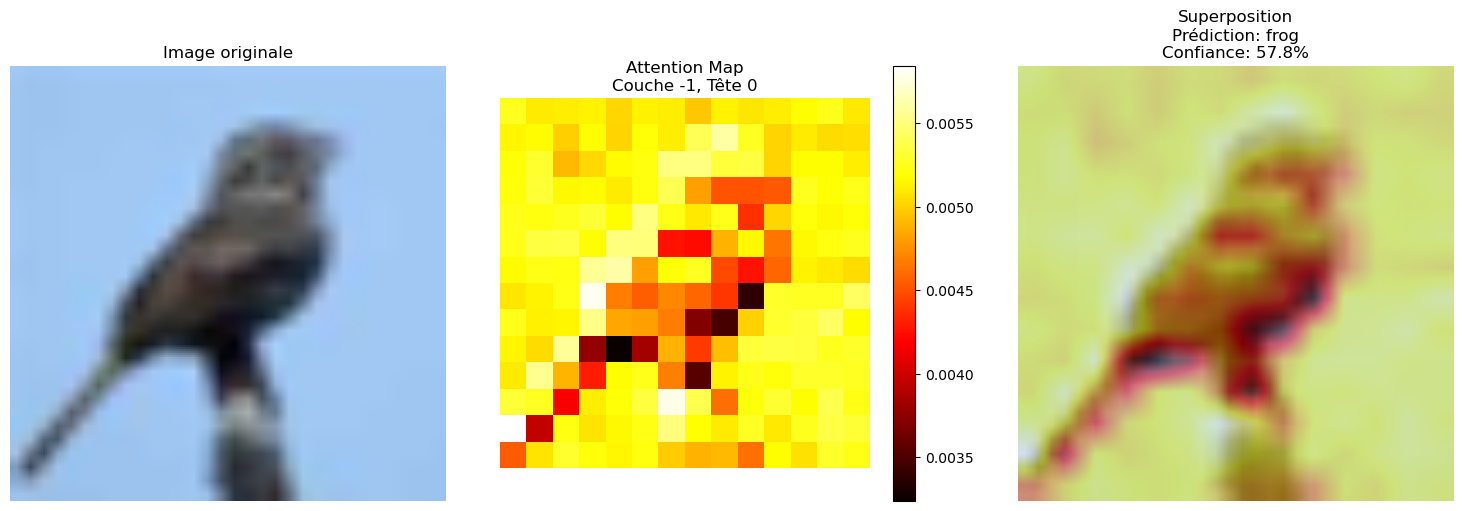

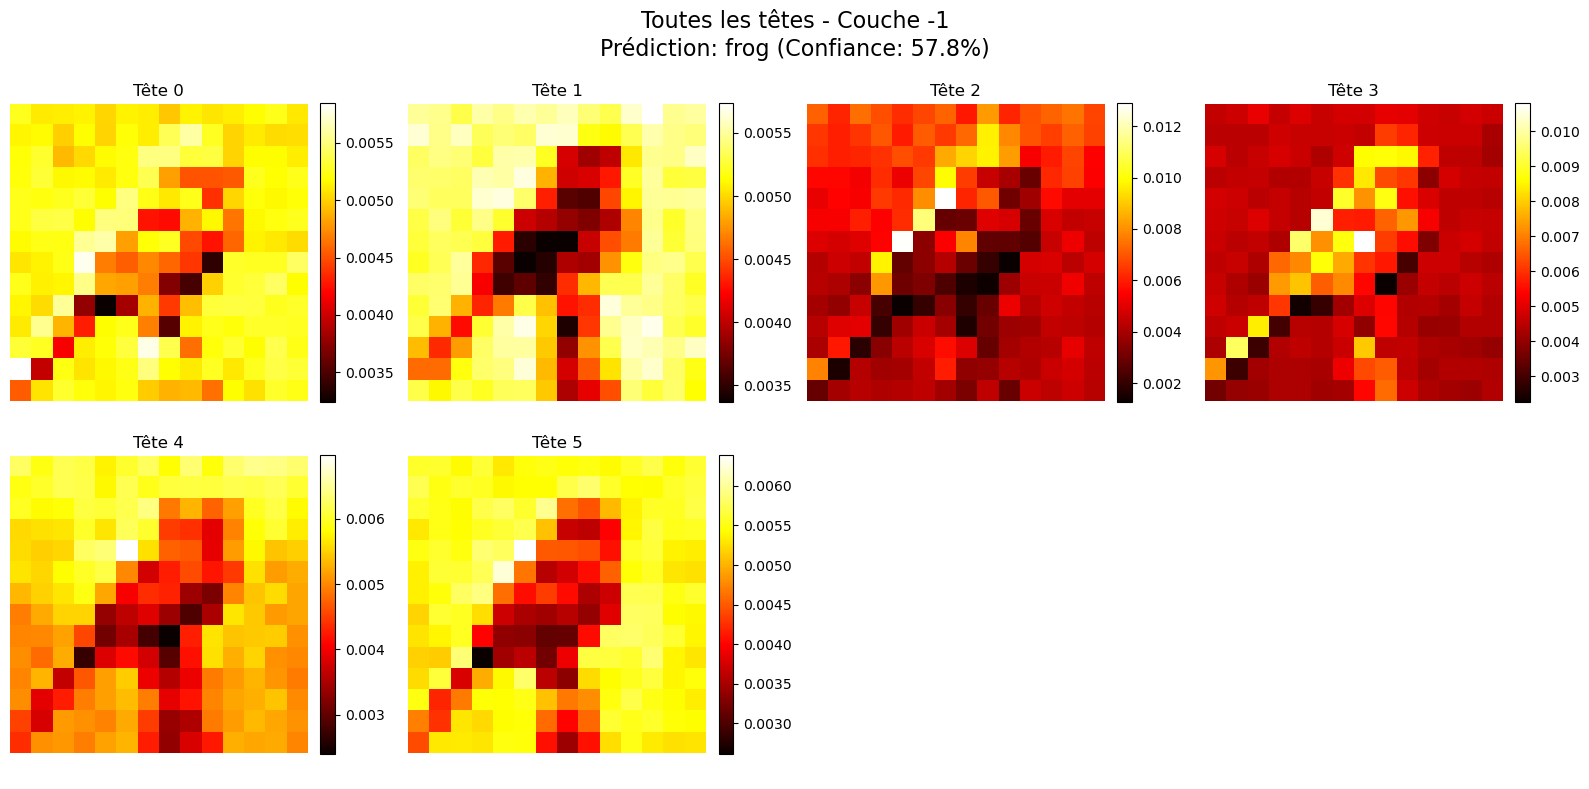

In [75]:
# 1. Instanciation de l'interpréteur
interpreter_cifar = ViTInterpreter(model_vit_cifar, device)

# 2. Récupération d'une image de test CIFAR
# On prend le loader de validation défini précédemment
images, labels = next(iter(loader_vit_cifar_val))
image = images[0] # Prend la 1ère image du batch
label = labels[0].item()
true_class_name = cifar_classes[label]

print(f"--- Analyse ViT CIFAR-10 ---")
print(f"Vraie classe : {true_class_name}")

# 3. Visualisation d'une tête spécifique (ex: Dernière couche, Tête 0)
# Cela montre où le modèle regarde "le plus" juste avant de décider
_ = interpreter_cifar.visualize_attention(
    image, 
    class_names=cifar_classes, 
    layer_idx=-1,  # Dernière couche
    head_idx=0     # Première tête d'attention
)

# 4. Visualisation de TOUTES les têtes de la dernière couche
# Permet de voir la diversité : certaines têtes regardent la forme, d'autres le fond, etc.
interpreter_cifar.visualize_all_heads(
    image, 
    class_names=cifar_classes, 
    layer_idx=-1
)

--- Analyse ViT Hymenoptera ---
Vraie classe : ants


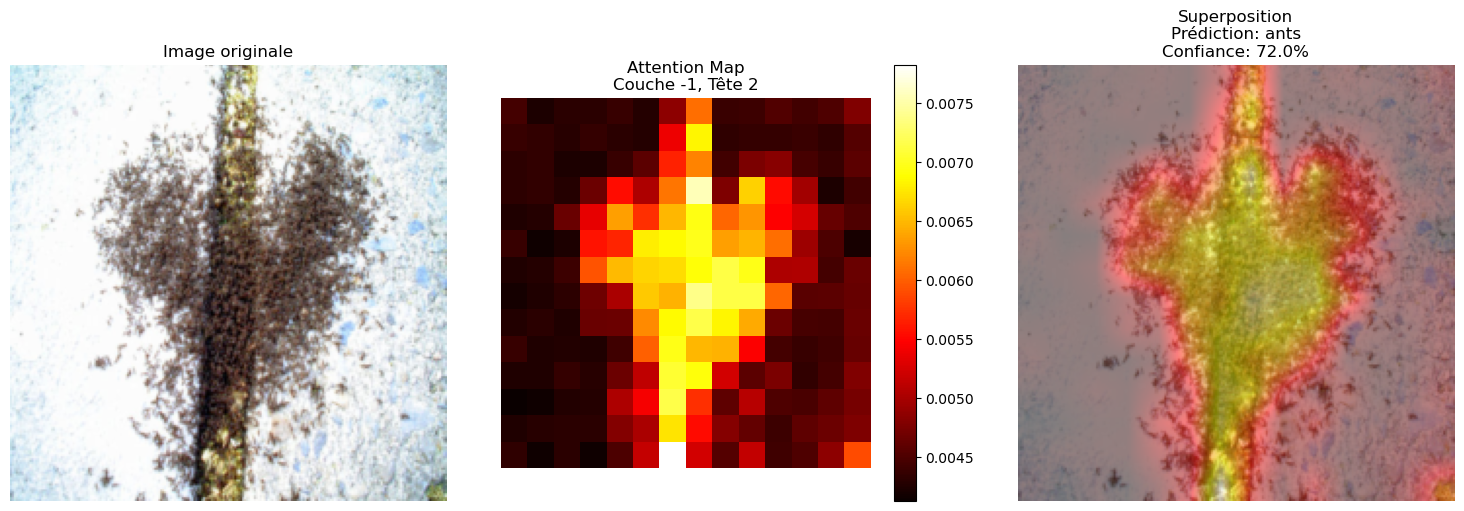

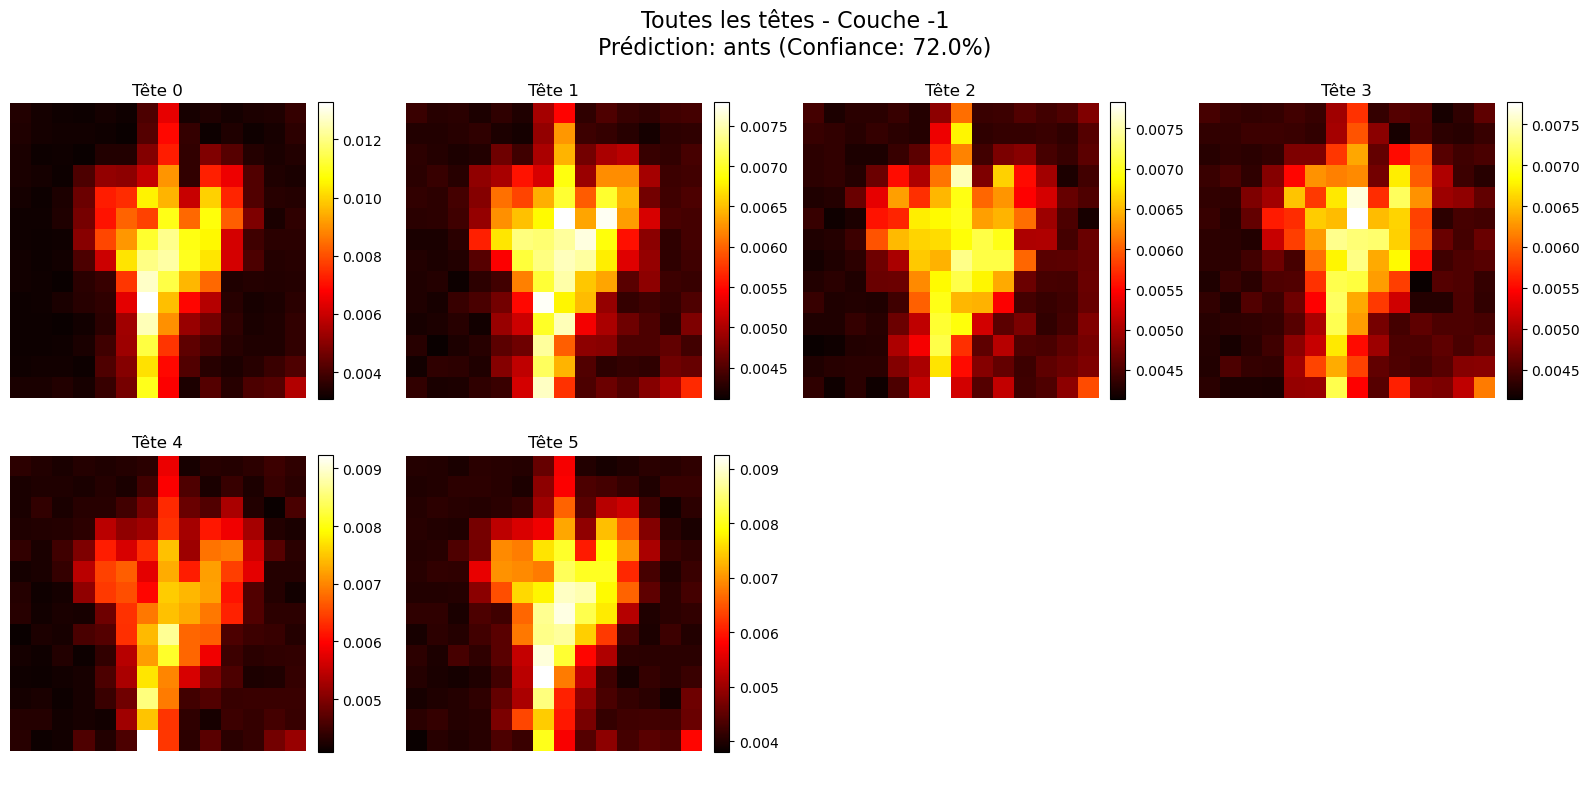

In [74]:
# 1. Instanciation de l'interpréteur
interpreter_hym = ViTInterpreter(model_vit_hym, device)

# 2. Récupération d'une image de test Hymenoptera
images_h, labels_h = next(iter(loader_vit_hym_val))
image_h = images_h[0]
label_h = labels_h[0].item()
true_class_h = hym_classes[label_h] # ['ants', 'bees']

print(f"--- Analyse ViT Hymenoptera ---")
print(f"Vraie classe : {true_class_h}")

# 3. Visualisation Focus (Dernière couche)
_ = interpreter_hym.visualize_attention(
    image_h, 
    class_names=hym_classes, 
    layer_idx=-1, 
    head_idx=2 # Essayons une tête différente, ex: index 2
)

# 4. Visualisation Globale (Toutes les têtes)
interpreter_hym.visualize_all_heads(
    image_h, 
    class_names=hym_classes, 
    layer_idx=-1
)